In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("Phishing_Email.csv")
df = df.dropna()
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [3]:
# Encode labels
lbl = LabelEncoder()
df['Email Type'] = lbl.fit_transform(df['Email Type'])

In [4]:
# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text).lower().strip()
    return re.sub(r'\s+', ' ', text)

df['Email Text'] = df['Email Text'].apply(preprocess_text)

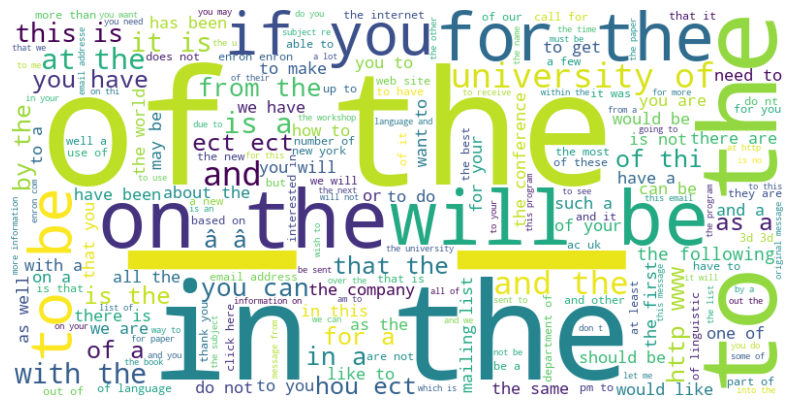

In [5]:
# Generate a word cloud
from wordcloud import WordCloud

all_mails = " ".join(df['Email Text'])
word_cloud = WordCloud(stopwords="english", width=800, height=400, background_color='white').generate(all_mails)
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# Feature extraction
tf = TfidfVectorizer(stop_words='english', max_features=10000)
features = tf.fit_transform(df['Email Text']).toarray()
labels = np.array(df['Email Type'])

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)


Logistic Regression
Best Parameters: {'C': 100}
Accuracy: 98.46066134549602
F1 Score: 98.74884151992586
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



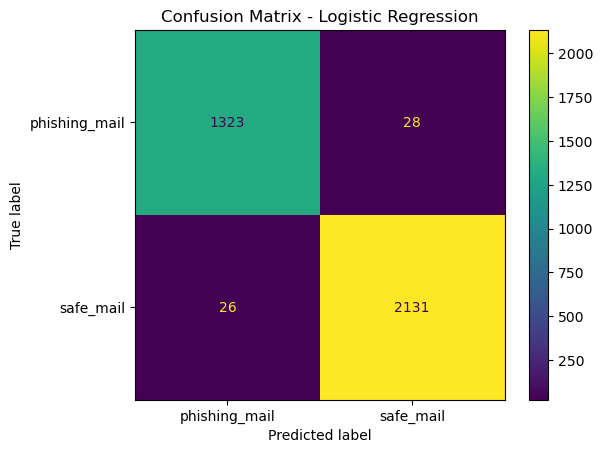

In [8]:
# Logistic Regression with hyperparameter tuning
lg_params = {'C': [0.1, 1, 10, 100]}
lg = GridSearchCV(LogisticRegression(), lg_params, cv=5)
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
print("Logistic Regression")
print("Best Parameters:", lg.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_lg) * 100)
print("F1 Score:", f1_score(y_test, pred_lg) * 100)
print(classification_report(y_test, pred_lg))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_lg), display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# XGBoost with hyperparameter tuning
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("XGBoost")
print("Best Parameters:", xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_xgb) * 100)
print("F1 Score:", f1_score(y_test, pred_xgb) * 100)
print(classification_report(y_test, pred_xgb))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_xgb), display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
# Random Forest with hyperparameter tuning
rnf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rnf = GridSearchCV(RandomForestClassifier(), rnf_params, cv=5)
rnf.fit(X_train, y_train)
pred_rnf = rnf.predict(X_test)
print("Random Forest")
print("Best Parameters:", rnf.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_rnf) * 100)
print("F1 Score:", f1_score(y_test, pred_rnf) * 100)
print(classification_report(y_test, pred_rnf))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rnf), display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()